#Что такое данные
и нафига нам вообще эта машинка
А ещё мы узнаем
* Что такое numpy и как работать с данными
* Что такое matplotlib и как строить граффики
* Что такое sklearn и какие у него есть модели
* Как быть, если ваши данные имеют не числовой формат.

#Есть время на ириску?

In [1]:
#загрузим данные
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [2]:
print "len(X) = ",len(X)
print "X.shape = ",X.shape

len(X) =  150
X.shape =  (150, 4)


In [3]:
print X[:10] #выведем первые 10 элементов

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]


In [4]:
print X[0:10:2] #выведем элементы 0, 2, 4, 6 и 8

[[ 5.1  3.5  1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 4.6  3.4  1.4  0.3]
 [ 4.4  2.9  1.4  0.2]]


In [5]:
print X[0,2] #конкретный элемент (0 строка, 2 столбец)

1.4


#Немного картинок

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

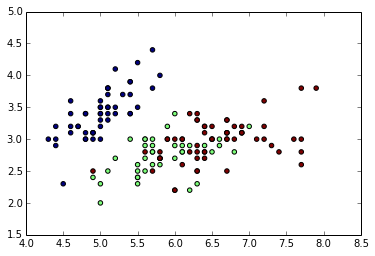

In [8]:
plt.scatter(X[:,0], X[:,1], c = Y)

In [ ]:
#построй такой же граффик по вторым 2 колонкам


#пора обучать машины...

In [9]:
X_train = X[0:149:2]
Y_train = Y[0:149:2]
X_test = X[1:150:2]
Y_test = Y[1:150:2]

In [13]:
#выведи размеры Y_train


In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 100)
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [12]:
Y_pred_test = model.predict(X_test)
print Y_pred_test[::3]
print Y_test[::3]

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 2 2 2 2 2 1 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


In [14]:
from sklearn.metrics import accuracy_score
print accuracy_score(Y_test, Y_pred_test)

0.946666666667


In [15]:
from sklearn.neighbors import KNeighborsClassifier

my_knn_classifier = KNeighborsClassifier()
my_knn_classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [16]:
Y_knn_test = my_knn_classifier.predict(X_test)
print Y_knn_test[::3]
print Y_test[::3]

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


In [17]:
#Оцени точность прогноза модели на X_test
print  accuracy_score(Y_test, Y_knn_test)

0.986666666667


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

#А теперь реальность

In [18]:
import pandas
tweets = pandas.DataFrame.from_csv("Tweets data.csv")

In [20]:
print len(tweets)
print tweets[:10]

99989
        Sentiment                                      SentimentText
ItemID                                                              
1               0                       is so sad for my APL frie...
2               0                     I missed the New Moon trail...
3               1                            omg its already 7:30 :O
4               0            .. Omgaga. Im sooo  im gunna CRy. I'...
5               0           i think mi bf is cheating on me!!!   ...
6               0                  or i just worry too much?        
7               1                 Juuuuuuuuuuuuuuuuussssst Chillin!!
8               0         Sunny Again        Work Tomorrow  :-|  ...
9               1        handed in my uniform today . i miss you ...
10              1           hmmmm.... i wonder how she my number @-)


In [21]:
texts = tweets["SentimentText"]
Y = tweets["Sentiment"]

In [124]:
def extract_features(text):
    features = []
    
    
    features.append(len(text))
    
    text_lower = text.lower()
    features.append(text_lower.count("sad"))
    features.append(text_lower.count(" a "))
    features.append(text_lower.count("fun"))
    features.append(text_lower.count("super"))
    features.append(text_lower.count("cool"))
    features.append(text_lower.count("lol"))
    features.append(text_lower.count("c:"))
    features.append(text_lower.count(":3"))
    features.append(text_lower.count("AARRGH"))
    features.append(text_lower.count(">:c"))
    features.append(text_lower.count("sucker"))
    features.append(text_lower.count("shit"))
    features.append(text_lower.count("cute"))
    
    al = "abcdefghiklmnopqrstuvwxyz"
    for i in range (len(al)):
      for g in range (len(al)):
        u = al[i]+al[g]
        features.append(text_lower.count(u))
        
    features.append(text_lower.count("."))
    
    
    return features

IndentationError: unexpected indent (<ipython-input-124-668682a27329>, line 30)

In [ ]:
import numpy
X = []
for text in texts:
    X.append(extract_features(text))
X = numpy.array(X)

X[:10]

In [ ]:
plt.figure(figsize=[10,10])
plt.scatter(X[:,0],X[:,11],c = Y)

In [ ]:
for text in texts[X[:,12] >= 1]:
    print text 

#Мы снова в деле!

In [125]:
#порежем данные
X_train = X[:70000]
Y_train = Y[:70000]
X_test = X[70000:]
Y_test = Y[70000:]

In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train,Y_train)

In [127]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
print "Обучение:",accuracy_score(Y_train,Y_pred_train)
print "Тест:",accuracy_score(Y_test,Y_pred_test)


Обучение: 0.689842857143
Тест: 0.682817032912
